In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import dateutil.parser
import time
import pytz
import pickle

plt.rcParams['axes.unicode_minus'] = False

In [8]:
timeList = list()
counter = Counter()

with open('time_lst2.bin', 'rb') as f:
    while True:
        try:
            timeList += pickle.load(f)
        except:
            break

with open('counter2.bin', 'rb') as f:
    counter = pickle.load(f)

In [9]:
tag_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
tag_df.columns = ["index", "count"]
tag_df.sort_values("count", 0,False, True)

idx_num = tag_df[tag_df['count'] <= 20].index
tag_df = tag_df.drop(idx_num)
i = 0
index = []
for _ in tag_df['count']:
  index.append(i)
  i+=1
tag_df.index = index
tag_df

,index,count
0,먹스타그램,927
1,맛스타그램,378
2,일상,281
3,소통,207
4,먹방,204
...,...,...
124,브런치,22
125,저지리,22
126,파스타,21
127,협찬,21


In [10]:
time_dict = {}
for i in range(0, 24):
  time_dict[i] = 0
for isotime in timeList:
  utctime = dateutil.parser.parse(isotime)
  localtime = utctime.astimezone(pytz.timezone("Asia/Seoul"))
  time_dict[localtime.hour] += 1
print(time_dict)

time_df = pd.DataFrame.from_dict(time_dict, orient='index').reset_index()
time_df.columns = ['time', 'count']
time_df

{0: 146, 1: 75, 2: 70, 3: 32, 4: 25, 5: 34, 6: 40, 7: 61, 8: 104, 9: 163, 10: 211, 11: 35, 12: 8, 13: 19, 14: 12, 15: 14, 16: 14, 17: 22, 18: 20, 19: 23, 20: 118, 21: 337, 22: 270, 23: 246}


,time,count
0,0,146
1,1,75
2,2,70
3,3,32
4,4,25
5,5,34
6,6,40
7,7,61
8,8,104
9,9,163


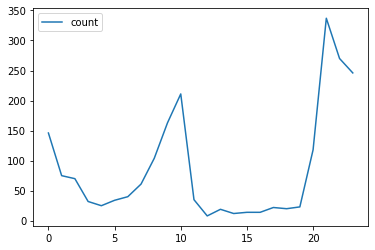

In [11]:
lines = time_df.plot.line(y="count")